In [1014]:
%load_ext autoreload
%autoreload 2

from torch import nn

import torch.nn.functional as F
import torch

from utils_external.sync_batchnorm import SynchronizedBatchNorm2d as BatchNorm2d
from utils_external.sync_batchnorm import SynchronizedBatchNorm3d as BatchNorm3d

from utils import Encoder, Decoder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1015]:
from keypoint_detector import KPDetector, Hourglass

In [1016]:
%reload_ext autoreload

In [842]:
y = torch.randn([10,3,256,256])

In [843]:
x = torch.randn([10,3,1,256,256])

In [844]:
c = Encoder(in_features=3, max_features=1024, block_expansion=32,dimension=2)

In [845]:
d = Decoder(in_features=3, max_features=1024, block_expansion=32, dimension=2, out_features=10)

In [846]:
d(c(y)).shape

torch.Size([10, 10, 256, 256])

In [847]:
from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [848]:
%reload_ext autoreload

In [849]:
x.shape

torch.Size([10, 3, 1, 256, 256])

In [850]:
x = torch.randn([1, 3, 256,256])
x.shape

torch.Size([1, 3, 256, 256])

In [851]:
img =  cv2.imread('../../../../../../../dataset/celebA/img_align_celeba/000001.jpg')
img.shape

(218, 178, 3)

In [900]:
img = torch.tensor(cv2.resize(cv2.imread('../../../../../../../dataset/celebA/img_align_celeba/000010.jpg'),(256,256))).float()
img.shape

torch.Size([256, 256, 3])

In [901]:
img = img.permute(2,0,1)
img.shape


torch.Size([3, 256, 256])

In [902]:
img = torch.unsqueeze(img, 0)
img.shape

torch.Size([1, 3, 256, 256])

In [903]:
kp_detector = KPDetector()

In [904]:
kp = kp_detector(img)

In [905]:
kp['value']

tensor([[[-0.0363,  1.0000],
         [-0.9678,  0.9549],
         [-0.5836, -0.1344],
         [ 0.6963, -0.8602],
         [ 0.5293, -1.0000],
         [ 0.6201, -0.8589],
         [ 0.3749, -1.0000],
         [ 0.6073,  0.4823],
         [ 0.3639, -0.8912],
         [-0.0980,  0.2866]]], grad_fn=<SumBackward1>)

In [906]:
mean = kp['value']
mean

tensor([[[-0.0363,  1.0000],
         [-0.9678,  0.9549],
         [-0.5836, -0.1344],
         [ 0.6963, -0.8602],
         [ 0.5293, -1.0000],
         [ 0.6201, -0.8589],
         [ 0.3749, -1.0000],
         [ 0.6073,  0.4823],
         [ 0.3639, -0.8912],
         [-0.0980,  0.2866]]], grad_fn=<SumBackward1>)

In [907]:
coordinate_grid = make_coordinate_grid(spatial_size, mean.type())

In [908]:
coordinate_grid.shape

torch.Size([256, 256, 2])

In [909]:
number_of_leading_dimensions = len(mean.shape) - 1
number_of_leading_dimensions

2

In [910]:
shape = (1,) * number_of_leading_dimensions + coordinate_grid.shape
shape

(1, 1, 256, 256, 2)

In [911]:
coordinate_grid = coordinate_grid.view(*shape)
coordinate_grid.shape

torch.Size([1, 1, 256, 256, 2])

In [912]:
repeats = mean.shape[:number_of_leading_dimensions] + (1, 1, 1)
repeats

torch.Size([1, 10, 1, 1, 1])

In [913]:
coordinate_grid = coordinate_grid.repeat(*repeats)
coordinate_grid.shape

torch.Size([1, 10, 256, 256, 2])

In [914]:
shape = mean.shape[:number_of_leading_dimensions] + (1, 1, 2)
shape

torch.Size([1, 10, 1, 1, 2])

In [915]:
mean = mean.view(*shape)
mean.shape

torch.Size([1, 10, 1, 1, 2])

In [916]:
mean_sub = (coordinate_grid - mean)
mean_sub.shape

torch.Size([1, 10, 256, 256, 2])

In [917]:
out = torch.exp(-0.5 * (mean_sub ** 2).sum(-1) /0.001)
out.shape

torch.Size([1, 10, 256, 256])

In [918]:
out[0][0].shape

torch.Size([256, 256])

In [919]:
out[0][2] 

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<SelectBackward>)

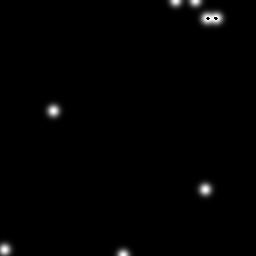

In [923]:
h_img = TF.to_pil_image(out[0][0]+out[0][1]+out[0][2]+out[0][3]+out[0][4]+out[0][5]+out[0][6]+out[0][7])

h_img

In [926]:
h_img.shape

AttributeError: shape

In [ ]:
import torchvision.transforms.functional as TF
img = TF.to_pil_image(x)

In [944]:
img = torch.tensor(cv2.resize(cv2.imread('../../../../../../../dataset/celebA/img_align_celeba/000015.jpg'),(256,256))).float().permute(2,0,1)
print(img.shape)

heatmap = torch.Tensor(out[0][0]+out[0][1]+out[0][2]+out[0][3]+out[0][4]+out[0][5]+out[0][6]+out[0][7]).unsqueeze(0)
img = TF.to_pil_image(img)  # assuming your image in x

heatmap = torch.cat((heatmap, torch.zeros(2, 256, 256)))
# h_img = TF.to_pil_image(heatmap)

h_img = TF.to_pil_image(heatmap)
res = Image.blend(img, h_img, 0.5)

torch.Size([3, 256, 256])


torch.Size([3, 256, 256])


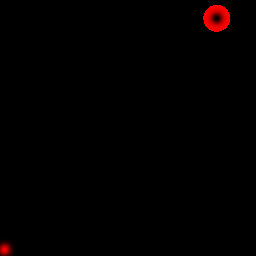

In [951]:
img = torch.tensor(cv2.resize(cv2.imread('../../../../../../../dataset/celebA/img_align_celeba/000015.jpg'),(256,256))).float().permute(2,0,1)
print(img.shape)

heatmap = torch.Tensor(out[0][1]-out[0][3]).unsqueeze(0)
img = TF.to_pil_image(img)  # assuming your image in x

heatmap = torch.cat((heatmap, torch.zeros(2, 256, 256)))
# h_img = TF.to_pil_image(heatmap)

h_img = TF.to_pil_image(heatmap)
h_img

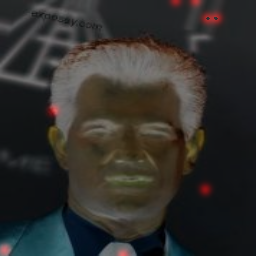

In [945]:
res

In [931]:
torch.Tensor(out[0][0]+out[0][1]+out[0][2]+out[0][3]+out[0][4]+out[0][5]+out[0][6]+out[0][7]).unsqueeze(0).shape

torch.Size([1, 256, 256])

In [934]:
heatmap = torch.empty(1, 252, 271).uniform_(0, 1)
print(heatmap.shape)
heatmap = torch.cat((heatmap, torch.zeros(2, 252, 271)))

torch.Size([1, 252, 271])


In [882]:
d3_hourglass = Hourglass(dimension=3)

In [878]:
d3_kp = KPDetector(dimension=3)

In [884]:
x = torch.randn([2, 3, 1, 256,256])
key_3d = d3_hourglass(x)

key_3d.shape

torch.Size([2, 10, 1, 256, 256])

In [ ]:
shape = heatmap.shape
#adding small eps to avoid 'nan' in variance
heatmap = heatmap.unsqueeze(-1) + 1e-7
grid = make_coordinate_grid(shape[3:], heatmap.type()).unsqueeze_(0).unsqueeze_(0).unsqueeze_(0)

mean = (heatmap * grid).sum(dim=(3, 4))

kp = {'mean': mean.permute(0, 2, 1, 3)}

In [ ]:
img = torch.tensor(cv2.resize(cv2.imread('../../../../../../../dataset/celebA/img_align_celeba/000011.jpg'),(256,256))).float()
img = img.permute(2,0,1)

In [615]:

img.unsqueeze_(0)
img.shape

torch.Size([1, 3, 256, 256])

In [616]:
img.shape

torch.Size([1, 3, 256, 256])

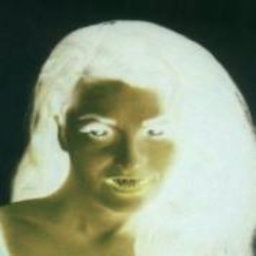

In [617]:
h_img = TF.to_pil_image(img.reshape(3,256,256))

h_img

In [618]:
x.type(), img.type()

('torch.FloatTensor', 'torch.FloatTensor')

In [619]:
heatmap_3d = a(img)

heatmap_3d.shape

torch.Size([1, 10, 256, 256])

In [620]:
heatmap_3d = heatmap_3d.reshape(10,256,256)
heatmap_3d.shape

torch.Size([10, 256, 256])

In [637]:
heatmap = np.maximum(heatmap_3d)

ValueError: invalid number of arguments

In [ ]:
heatmap.shape

In [621]:
aaa = heatmap_3d[1].unsqueeze(0)
aaa.shape

torch.Size([1, 256, 256])

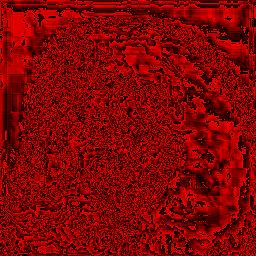

In [625]:
aaa = heatmap_3d[2].unsqueeze(0)
aaa.shape
heatmap_tmp = torch.cat((aaa, torch.zeros(2,256,256)))
h_img = TF.to_pil_image(heatmap_tmp)

h_img

In [633]:
import numpy as np
heatmap = torch.tensor.detach().numpy(255*aaa[0])
cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

AttributeError: 'builtin_function_or_method' object has no attribute 'detach'

In [562]:

img = TF.to_pil_image(torch.Tensor(cv2.imread('../../../../../../../dataset/celebA/img_align_celeba/000001.jpg').resize(256,256)))  # assuming your image in x


TypeError: new(): data must be a sequence (got NoneType)

## Visualization start

In [769]:
model = Hourglass(dimension=2, num_kp=10)

In [795]:
model

Hourglass(
  (encoder): Encoder(
    (down_blocks): ModuleList(
      (0): DownBlock2d(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (norm): SynchronizedBatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (pool): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
      )
      (1): DownBlock2d(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (norm): SynchronizedBatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (pool): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
      )
      (2): DownBlock2d(
        (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (norm): SynchronizedBatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (pool): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
      )
    )
  )
  (decoder): Decoder(
    (up_blocks): M

In [796]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        print(name)
        activation[name] = output.detach()
    return hook


In [797]:
model.encoder.down_blocks[1].conv

Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [798]:
model.encoder.down_blocks[0].conv

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [799]:
model.decoder.conv

Conv2d(35, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [800]:
model.decoder.conv.register_forward_hook(get_activation('conv'))

In [781]:
img = torch.tensor(cv2.resize(cv2.imread('../../../../../../../dataset/celebA/img_align_celeba/000011.jpg'),(256,256))).float()
x = img.permute(2,0,1)
x = x.reshape(1, 3, 256, 256)
output = model(x)

print(output.shape)

conv
torch.Size([1, 10, 256, 256])


In [757]:
output = output.squeeze()
output.shape

torch.Size([10, 96, 96])

In [782]:
act = activation['conv'].squeeze()

In [783]:
act.shape

torch.Size([32, 256, 256])

In [803]:
output[0].shape

torch.Size([10, 256, 256])

In [804]:
output[0][0].shape

torch.Size([256, 256])

In [809]:
import PIL
import torchvision.transforms as transforms
tf = transforms.ToPILImage()
img = tf(output[0][2])

img.show()

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

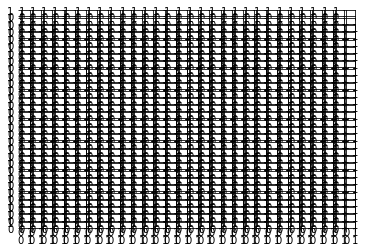

In [805]:
# fig.set_size_inches(18.5, 10.5)
fig, axarr = plt.subplots(30, 30)
for idx in range(output[0].size(0)):
    axarr[idx].imshow(tf(output[0][idx]))

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

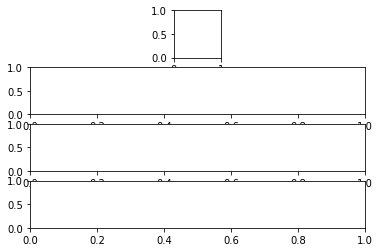

In [758]:
num_plot = 4
fig, axarr = plt.subplots(min(act.size(0), num_plot))
for idx in range(min(act.size(0), num_plot)):
    axarr[idx].imshow(output[idx])

## Visualization end

In [659]:
act = activation['0'].squeeze()

In [660]:
act.shape

torch.Size([256, 9, 9])

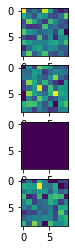

In [662]:
import matplotlib.pyplot as plt

num_plot = 4
fig, axarr = plt.subplots(min(act.size(0), num_plot))
for idx in range(min(act.size(0), num_plot)):
    axarr[idx].imshow(act[idx])

In [541]:
heatmap_3d.shape

torch.Size([1, 10, 256, 256])

In [548]:
heatmap_3d = heatmap_3d.view(10, 256, 256)

In [549]:
heatmap_3d.shape

torch.Size([10, 256, 256])

In [554]:
heatmap_3d_tmp = heatmap_3d[0].unsqueeze(0)

In [555]:
heatmap_3d_tmp.shape

torch.Size([1, 256, 256])

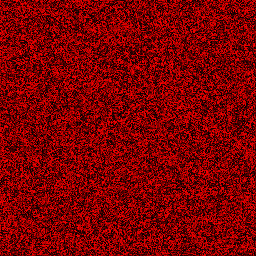

In [557]:
heatmap_tmp = torch.cat((heatmap_3d_tmp, torch.zeros(2,256,256)))
h_img = TF.to_pil_image(heatmap_tmp)

h_img

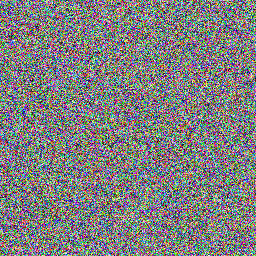

In [560]:
img =  TF.to_pil_image(x)
img

In [544]:
heatmap = torch.empty(1, 256, 256).uniform_(0, 1)
heatmap = torch.cat((heatmap, torch.zeros(2, 256, 256)))

print(heatmap.shape)
import torchvision.transforms.functional as TF
img = TF.to_pil_image(cv2.imread('../../../../../../../dataset/celebA/img_align_celeba/000001.jpg').resize(256,256))  # assuming your image in x
h_img = TF.to_pil_image(heatmap)

res = Image.blend(img, h_img, 0.5)

torch.Size([3, 256, 256])


TypeError: pic should be Tensor or ndarray. Got <class 'NoneType'>.

In [1099]:
4100*11

45100

In [1100]:
14100 + 4100*8

46900

In [1107]:

# Python3 code for Dynamic Programming 
# based solution for 0-1 Knapsack problem 
  
# Prints the items which are put in a  
# knapsack of capacity W 
def printknapSack(W, wt, val, n): 
    K = [[0 for w in range(W + 1)] 
            for i in range(n + 1)] 
              
    # Build table K[][] in bottom 
    # up manner 
    for i in range(n + 1): 
        for w in range(W + 1): 
            if i == 0 or w == 0: 
                K[i][w] = 0
            elif wt[i - 1] <= w: 
                K[i][w] = max(val[i - 1]  
                  + K[i - 1][w - wt[i - 1]], 
                               K[i - 1][w]) 
            else: 
                K[i][w] = K[i - 1][w] 
  
    # stores the result of Knapsack 
    res = K[n][W] 
    print(res) 
      
    w = W 
    for i in range(n, 0, -1): 
        if res <= 0: 
            break
        # either the result comes from the 
        # top (K[i-1][w]) or from (val[i-1] 
        # + K[i-1] [w-wt[i-1]]) as in Knapsack 
        # table. If it comes from the latter 
        # one/ it means the item is included. 
        if res == K[i - 1][w]: 
            continue
        else: 
  
            # This item is included. 
            print(wt[i - 1]) 
              
            # Since this weight is included 
            # its value is deducted 
            res = res - val[i - 1] 
            w = w - wt[i - 1] 

val = [ 14100, 9800, 4100, 14100, 9800, 4100, 14100, 9800, 4100, 14100, 9800, 4100, 10200,10200] 
wt = [ 14100, 9800, 4100, 14100, 9800, 4100, 14100, 9800, 4100, 14100, 9800, 4100, 10200,10200]
W = 46800
n = len(val) 
      
printknapSack(W, wt, val, n) 

46800
10200
10200
4100
4100
4100
14100


In [ ]:
item = 

In [535]:
kp = KPDetector(dimension=2, num_kp=10, temperature=0.1)

In [537]:
kp(x)['heatmap'].shape

torch.Size([10, 10, 256, 256])

In [391]:
tmp_1 = F.interpolate(x, scale_factor=(0.25, 0.25))
tmp_1.shape

ValueError: scale_factor shape must match input shape. Input is 3D, scale_factor is 2

In [256]:
a= Hourglass(dimension=2, num_kp=10)

In [257]:
heatmap = a(x)
heatmap.shape

final_shape = heatmap.shape

In [258]:
heatmap = heatmap.view(final_shape[0], final_shape[1], -1)
heatmap.shape

torch.Size([10, 10, 65536])

In [259]:
heatmap_tmp = F.softmax(heatmap / 0.1, dim=2)
heatmap_tmp.shape

torch.Size([10, 10, 65536])

In [234]:
heatmap_tmp[0][0]

tensor([2.5754e-09, 6.7504e-11, 2.1276e-10,  ..., 4.2270e-08, 1.4624e-07,
        6.2656e-10], grad_fn=<SelectBackward>)

In [351]:
heatmap_tmp = F.softmax(heatmap / 0.5, dim=2)
heatmap_tmp.shape
heatmap_tmp[0][0]

tensor([[0.0022, 0.0069, 0.0059,  ..., 0.0155, 0.0047, 0.0031],
        [0.0021, 0.0051, 0.0044,  ..., 0.0068, 0.0018, 0.0012],
        [0.0032, 0.0058, 0.0068,  ..., 0.0027, 0.0038, 0.0035],
        ...,
        [0.0054, 0.0069, 0.0034,  ..., 0.0022, 0.0010, 0.0014],
        [0.0024, 0.0029, 0.0023,  ..., 0.0011, 0.0017, 0.0054],
        [0.0048, 0.0020, 0.0019,  ..., 0.0017, 0.0018, 0.0041]],
       grad_fn=<SelectBackward>)

In [352]:
heatmap_tmp = heatmap_tmp.view(*final_shape)
heatmap_tmp.shape

torch.Size([10, 10, 256, 256])

In [353]:
shape  = heatmap_tmp.shape
aaa = heatmap_tmp.unsqueeze(-1)
aaa.shape

torch.Size([10, 10, 256, 256, 1])

In [354]:
grid = make_coordinate_grid(heatmap_tmp.shape[2:], heatmap_tmp.type()).unsqueeze_(0).unsqueeze_(0)
grid.shape

torch.Size([1, 1, 256, 256, 2])

In [371]:
grid[0][0]

tensor([[[-1.0000, -1.0000],
         [-0.9922, -1.0000],
         [-0.9843, -1.0000],
         ...,
         [ 0.9843, -1.0000],
         [ 0.9922, -1.0000],
         [ 1.0000, -1.0000]],

        [[-1.0000, -0.9922],
         [-0.9922, -0.9922],
         [-0.9843, -0.9922],
         ...,
         [ 0.9843, -0.9922],
         [ 0.9922, -0.9922],
         [ 1.0000, -0.9922]],

        [[-1.0000, -0.9843],
         [-0.9922, -0.9843],
         [-0.9843, -0.9843],
         ...,
         [ 0.9843, -0.9843],
         [ 0.9922, -0.9843],
         [ 1.0000, -0.9843]],

        ...,

        [[-1.0000,  0.9843],
         [-0.9922,  0.9843],
         [-0.9843,  0.9843],
         ...,
         [ 0.9843,  0.9843],
         [ 0.9922,  0.9843],
         [ 1.0000,  0.9843]],

        [[-1.0000,  0.9922],
         [-0.9922,  0.9922],
         [-0.9843,  0.9922],
         ...,
         [ 0.9843,  0.9922],
         [ 0.9922,  0.9922],
         [ 1.0000,  0.9922]],

        [[-1.0000,  1.0000],
       

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [356]:
(aaa * grid).shape

torch.Size([10, 10, 256, 256, 2])

In [357]:
(aaa * grid).sum(dim=(2,3)).shape

torch.Size([10, 10, 2])

In [387]:
mean = (aaa * grid).sum(dim=(2, 3))

In [388]:
mean.shape

torch.Size([10, 10, 2])

In [376]:
grid.shape

torch.Size([1, 1, 256, 256, 2])

In [389]:
mean.permutate(0,2,1,3)

AttributeError: 'Tensor' object has no attribute 'permutate'

In [385]:
mean.unsqueeze(0).unsqueeze(0).shape

torch.Size([1, 1, 10, 10, 2])

In [386]:
grid - mean

RuntimeError: The size of tensor a (256) must match the size of tensor b (10) at non-singleton dimension 3

In [382]:
grid.shape

torch.Size([1, 1, 256, 256, 2])

In [438]:
import cv2
from PIL import Image

In [483]:
heatmap = torch.empty(1, 256, 256).uniform_(0, 1)
heatmap = torch.cat((heatmap, torch.zeros(2, 256, 256)))

import torchvision.transforms.functional as TF
img = TF.to_pil_image(cv2.imread('../../../../../../../dataset/celebA/img_align_celeba/000001.jpg').resize(256,256))  # assuming your image in x
h_img = TF.to_pil_image(heatmap)

res = Image.blend(img, h_img, 0.5)

TypeError: pic should be Tensor or ndarray. Got <class 'NoneType'>.

In [444]:
heatmap.shape

torch.Size([3, 252, 271])

In [443]:
cv2.imwrite(heatmap,'a.png')

error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - Can't convert object of type 'Tensor' to 'str' for 'filename'
>  - Can't convert object of type 'Tensor' to 'str' for 'filename'


In [ ]:
import cv2

cv2.imread('')



In [431]:
import os
os.listdir('../../../../../../../dataset/celebA/img_align_celeba/000001.jpg')

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg',
 '000011.jpg',
 '000012.jpg',
 '000013.jpg',
 '000014.jpg',
 '000015.jpg',
 '000016.jpg',
 '000017.jpg',
 '000018.jpg',
 '000019.jpg',
 '000020.jpg',
 '000021.jpg',
 '000022.jpg',
 '000023.jpg',
 '000024.jpg',
 '000025.jpg',
 '000026.jpg',
 '000027.jpg',
 '000028.jpg',
 '000029.jpg',
 '000030.jpg',
 '000031.jpg',
 '000032.jpg',
 '000033.jpg',
 '000034.jpg',
 '000035.jpg',
 '000036.jpg',
 '000037.jpg',
 '000038.jpg',
 '000039.jpg',
 '000040.jpg',
 '000041.jpg',
 '000042.jpg',
 '000043.jpg',
 '000044.jpg',
 '000045.jpg',
 '000046.jpg',
 '000047.jpg',
 '000048.jpg',
 '000049.jpg',
 '000050.jpg',
 '000051.jpg',
 '000052.jpg',
 '000053.jpg',
 '000054.jpg',
 '000055.jpg',
 '000056.jpg',
 '000057.jpg',
 '000058.jpg',
 '000059.jpg',
 '000060.jpg',
 '000061.jpg',
 '000062.jpg',
 '000063.jpg',
 '000064.jpg',
 '000065.jpg',
 '000066.jpg',
 '000067.j

In [465]:
img = cv2.resize(cv2.imread('../../../../../../../dataset/celebA/img_align_celeba/000001.jpg'), (256,256))

In [471]:
img = torch.Tensor(img)
img.shape

torch.Size([256, 256, 3])

In [479]:
img = img.reshape((1,3, 256,256))
img.shape

torch.Size([1, 3, 256, 256])

In [481]:
a= Hourglass(dimension=2, num_kp=10)
heatmap = a(img)

heatmap.shape

torch.Size([1, 10, 256, 256])

In [341]:
heatmap_tmp.unsqueeze(-1)
heatmap_tmp.shape

torch.Size([10, 10, 256, 256])

In [ ]:
make_coordinate_grid(heatmap_tmp.shape[2:], aaa.type())

In [350]:
heatmap_tmp.shape[2:]

torch.Size([256, 256])

In [349]:
h, w = heatmap_tmp.shape[2:]
x = torch.arange(w).type(aaa.type())
y = torch.arange(h).type(aaa.type())

x.shape, y.shape

(torch.Size([256]), torch.Size([256]))

In [296]:
x = (2 * (x / (w - 1)) - 1)
y = (2 * (y / (h - 1)) - 1)

In [297]:
y.shape

torch.Size([256])

In [327]:
yy = y.view(-1, 1).repeat(1, w)
yy.shape

torch.Size([256, 256])

In [328]:
yy

tensor([[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-0.9922, -0.9922, -0.9922,  ..., -0.9922, -0.9922, -0.9922],
        [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
        ...,
        [ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
        [ 0.9922,  0.9922,  0.9922,  ...,  0.9922,  0.9922,  0.9922],
        [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]])

In [329]:
xx = x.view(1, -1).repeat(h, 1)
xx.shape

torch.Size([256, 256])

In [348]:
xx.shape

torch.Size([256, 256, 1, 1])

In [344]:
meshed = torch.cat([xx.unsqueeze_(2), yy.unsqueeze_(2)], 2)
meshed.shape

torch.Size([256, 256, 2, 1])

In [345]:
meshed = meshed.unsqueeze_(0).unsqueeze_(0)
meshed.shape

torch.Size([1, 1, 256, 256, 2, 1])

In [346]:
meshed.squeeze_(-1)
meshed.shape

torch.Size([1, 1, 256, 256, 2])

In [318]:
meshed.unsqueeze_(0).unsqueeze_(0).unsqueeze_(0).shape

torch.Size([1, 1, 1, 1, 1, 1, 256, 256, 2])

In [312]:
heatmap_tmp.shape

torch.Size([10, 10, 256, 256])

In [347]:
(heatmap_tmp * meshed).shape

RuntimeError: The size of tensor a (256) must match the size of tensor b (2) at non-singleton dimension 4

In [310]:
mean = (heatmap_tmp * meshed).sum(dim=(2,3))
mean.shape

RuntimeError: The size of tensor a (256) must match the size of tensor b (2) at non-singleton dimension 3

In [ ]:
make_coordinate_grid(shape[2:], heatmap.type())

In [261]:
def gaussian2kp_2d(heatmap):
    """
    Extract the mean and from a heatmap
    """
    shape = heatmap.shape
    heatmap = heatmap.unsqueeze(-1)
    grid = make_coordinate_grid(shape[2:], heatmap.type()).unsqueeze_(0).unsqueeze_(0)
    value = (heatmap * grid).sum(dim=(2, 3))
    kp = {'value': value}

    return kp


In [269]:
out = gaussian2kp_2d(heatmap)

NameError: name 'make_coordinate_grid' is not defined

In [265]:
shape = heatmap.shape
shape

torch.Size([10, 10, 256, 256])

In [266]:
heatmap.type()

'torch.FloatTensor'

In [272]:
h, w = shape
type = heatmap.type()

ValueError: too many values to unpack (expected 2)

In [463]:
# Create heatmap image in red channel
heatmap = torch.empty(1, 256, 256).uniform_(0, 1)
heatmap = torch.cat((heatmap, torch.zeros(2, 256, 256)))

import torchvision.transforms.functional as TF
img = TF.to_pil_image(img)  # assuming your image in x
h_img = TF.to_pil_image(heatmap)

res = Image.blend(img, h_img, 0.5)

TypeError: pic should be Tensor or ndarray. Got <class 'PIL.Image.Image'>.

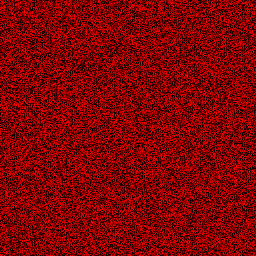

In [460]:
h_img

In [453]:
heatmap.shape

torch.Size([3, 256, 256])

In [454]:
img = cv2.resize(cv2.imread('../../../../../../../dataset/celebA/img_align_celeba/000001.jpg'), (256,256))
img.shape

(256, 256, 3)

In [461]:
res = Image.blend(img, h_img, 0.5)

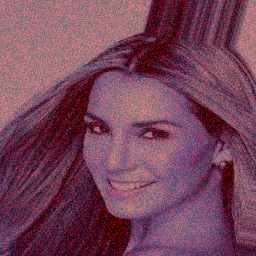

In [462]:
res

In [270]:
def make_coordinate_grid(spatial_size, type):
    """
    Create a meshgrid [-1,1] x [-1,1] of given spatial_size.
    """
    h, w = spatial_size
    x = torch.arange(w).type(type)
    y = torch.arange(h).type(type)

    x = (2 * (x / (w - 1)) - 1)
    y = (2 * (y / (h - 1)) - 1)

    yy = y.view(-1, 1).repeat(1, w)
    xx = x.view(1, -1).repeat(h, 1)

    meshed = torch.cat([xx.unsqueeze_(2), yy.unsqueeze_(2)], 2)

    return meshed

In [ ]:
make_coordinate_grid(shape[2:], heatmap.type())

In [200]:
N, W = 4, 5
bag = [(2,3), (3,4), (4,5), (5,6)] # (weight,benefit) 순서

knap = [0 for _ in range(W+1)]

for i in range(N):
    for j in range(W, 1, -1):
        if bag[i][0] <= j:
            knap[j] = max(knap[j], knap[j-bag[i][0]] + bag[i][1])

print(knap)

[0, 0, 3, 4, 5, 7]


In [955]:
def printknapSack(W, wt, val, n):
    K = [[0 for w in range(W + 1)]
            for i in range(n + 1)]
             
    # Build table K[][] in bottom
    # up manner
    for i in range(n + 1):
        for w in range(W + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif wt[i - 1] <= w:
                K[i][w] = max(val[i - 1]
                  + K[i - 1][w - wt[i - 1]],
                               K[i - 1][w])
            else:
                K[i][w] = K[i - 1][w]
 
    # stores the result of Knapsack
    res = K[n][W]
    print(res)
     
    w = W
    for i in range(n, 0, -1):
        if res <= 0:
            break
        # either the result comes from the
        # top (K[i-1][w]) or from (val[i-1]
        # + K[i-1] [w-wt[i-1]]) as in Knapsack
        # table. If it comes from the latter
        # one/ it means the item is included.
        if res == K[i - 1][w]:
            continue
        else:
 
            # This item is included.
            print(wt[i - 1])
             
            # Since this weight is included
            # its value is deducted
            res = res - val[i - 1]
            w = w - wt[i - 1]

val = [9800, 4100, 9800, 4100, 9800, 4100, 9800, 4100, 14100, 14100, 14100]
wt =[9800, 4100, 9800, 4100, 9800, 4100, 9800, 4100, 14100, 14100, 14100]
W = 56600
n = len(val)
     
printknapSack(W, wt, val, n)

56200
14100
14100
14100
4100
9800


In [952]:
4300*3 + 9800*3 + 14100

56400

In [980]:
from keypoint_detector import kp2gaussian

In [999]:

class MovementEmbeddingModule(nn.Module):
    """
    Produce a keypoint representation that will be further used by other modules
    """

    def __init__(self, num_kp, kp_variance, num_channels, use_deformed_source_image=False, use_difference=False,
                 use_heatmap=True, add_bg_feature_map=False, heatmap_type='gaussian', norm_const='sum', scale_factor=1):
        super(MovementEmbeddingModule, self).__init__()

        assert heatmap_type in ['gaussian', 'difference']

        assert ((int(use_heatmap) + int(use_deformed_source_image) + int(use_difference)) >= 1)

        self.out_channels = (1 * use_heatmap + 2 * use_difference + num_channels * use_deformed_source_image) * (
            num_kp + add_bg_feature_map)

        self.kp_variance = kp_variance
        self.heatmap_type = heatmap_type
        self.use_difference = use_difference
        self.use_deformed_source_image = use_deformed_source_image
        self.use_heatmap = use_heatmap
        self.add_bg_feature_map = add_bg_feature_map
        self.norm_const = norm_const
        self.scale_factor = scale_factor

    def normalize_heatmap(self, heatmap):
        if self.norm_const == "sum":
            heatmap_shape = heatmap.shape
            heatmap = heatmap.view(heatmap_shape[0], heatmap_shape[1], heatmap_shape[2], -1)
            heatmap = heatmap / heatmap.sum(dim=3, keepdim=True)
            return heatmap.view(*heatmap_shape)
        else:
            return heatmap / self.norm_const

    def forward(self, source_image, kp_driving, kp_source):
        if self.scale_factor != 1:
            source_image = F.interpolate(source_image, scale_factor=(1, self.scale_factor, self.scale_factor))

        spatial_size = source_image.shape[3:]

        bs, _, _, h, w = source_image.shape
        _, d, num_kp, _ = kp_driving['mean'].shape

        inputs = []
        if self.use_heatmap:
            heatmap = self.normalize_heatmap(
                kp2gaussian(kp_driving, spatial_size=spatial_size, kp_variance=self.kp_variance))
            if self.heatmap_type == 'difference':
                heatmap_appearance = self.normalize_heatmap(
                    kp2gaussian(kp_source, spatial_size=spatial_size, kp_variance=self.kp_variance))
                heatmap = heatmap - heatmap_appearance
            if self.add_bg_feature_map:
                zeros = torch.zeros(bs, d, 1, h, w).type(heatmap.type())
                heatmap = torch.cat([zeros, heatmap], dim=2)
            heatmap = heatmap.unsqueeze(3)
            inputs.append(heatmap)

        num_kp += self.add_bg_feature_map
        if self.use_difference or self.use_deformed_source_image:
            kp_video_diff = kp_source['mean'] - kp_driving['mean']
            if self.add_bg_feature_map:
                zeros = torch.zeros(bs, d, 1, 2).type(kp_video_diff.type())
                kp_video_diff = torch.cat([zeros, kp_video_diff], dim=2)
            kp_video_diff = kp_video_diff.view((bs, d, num_kp, 2, 1, 1)).repeat(1, 1, 1, 1, h, w)

        if self.use_difference:
            inputs.append(kp_video_diff)

        if self.use_deformed_source_image:
            appearance_repeat = source_image.unsqueeze(1).unsqueeze(1).repeat(1, d, num_kp, 1, 1, 1, 1)
            appearance_repeat = appearance_repeat.view(bs * d * num_kp, -1, h, w)

            deformation_approx = kp_video_diff.view((bs * d * num_kp, -1, h, w)).permute(0, 2, 3, 1)
            coordinate_grid = make_coordinate_grid((h, w), type=deformation_approx.type())
            coordinate_grid = coordinate_grid.view(1, h, w, 2)
            deformation_approx = coordinate_grid + deformation_approx

            appearance_approx_deform = F.grid_sample(appearance_repeat, deformation_approx)
            appearance_approx_deform = appearance_approx_deform.view((bs, d, num_kp, -1, h, w))
            inputs.append(appearance_approx_deform)

        movement_encoding = torch.cat(inputs, dim=3)
        movement_encoding = movement_encoding.view(bs, d, -1, h, w)

        return movement_encoding.permute(0, 2, 1, 3, 4)


In [1008]:
mask_embedding = MovementEmbeddingModule(num_kp=10, kp_variance=0.01, num_channels=3,add_bg_feature_map=True, 
                                         heatmap_type='difference',use_heatmap=True, use_deformed_source_image=True,
                                         norm_const=100)

In [1009]:
mask_embedding

MovementEmbeddingModule()

In [1010]:
a =10
a+=True
a

11

In [1011]:
img =  cv2.imread('../../../../../../../dataset/celebA/img_align_celeba/000001.jpg')
img = torch.tensor(cv2.resize(cv2.imread('../../../../../../../dataset/celebA/img_align_celeba/000010.jpg'),(256,256))).float()
img = img.permute(2,0,1)
img = torch.unsqueeze(img, 0)

In [1012]:
img.shape

torch.Size([1, 3, 256, 256])

In [1013]:
kp_detector = KPDetector()

TypeError: super(type, obj): obj must be an instance or subtype of type

In [ ]:
kp_source = kp_detector(img)

In [ ]:
img2 = torch.tensor(cv2.resize(cv2.imread('../../../../../../../dataset/celebA/img_align_celeba/000020.jpg'),(256,256))).float()
img2 = img2.permute(2,0,1)
img2 = torch.unsqueeze(img2, 0)

In [1018]:
img = torch.randn([2,3,1,256,256])
img2= torch.randn([2,3,1,256,256])

In [1019]:
kp_detector = KPDetector(dimension=3)

In [1020]:
kp_source = kp_detector(img)
kp_driving = kp_detector(img2)

In [1021]:
def kp2gaussian(kp, spatial_size, kp_variance='matrix'):
    """
    Transform a keypoint into gaussian like representation
    """
    mean = kp['mean']

    coordinate_grid = make_coordinate_grid(spatial_size, mean.type())

    number_of_leading_dimensions = len(mean.shape) - 1
    shape = (1,) * number_of_leading_dimensions + coordinate_grid.shape

    coordinate_grid = coordinate_grid.view(*shape)
    repeats = mean.shape[:number_of_leading_dimensions] + (1, 1, 1)
    coordinate_grid = coordinate_grid.repeat(*repeats)

    # Preprocess kp shape
    shape = mean.shape[:number_of_leading_dimensions] + (1, 1, 2)
    mean = mean.view(*shape)

    mean_sub = (coordinate_grid - mean)
    if kp_variance == 'matrix':
        var = kp['var']
        inv_var = matrix_inverse(var)
        shape = inv_var.shape[:number_of_leading_dimensions] + (1, 1, 2, 2)
        inv_var = inv_var.view(*shape)
        under_exp = torch.matmul(torch.matmul(mean_sub.unsqueeze(-2), inv_var), mean_sub.unsqueeze(-1))
        under_exp = under_exp.squeeze(-1).squeeze(-1)
        out = torch.exp(-0.5 * under_exp)
    elif kp_variance == 'single':
        out = torch.exp(-0.5 * (mean_sub ** 2).sum(-1) / kp['var'])
    else:
        out = torch.exp(-0.5 * (mean_sub ** 2).sum(-1) / kp_variance)

    return out


In [1022]:
prediction = mask_embedding(img, kp_driving, kp_source)

c:\users\wetr2\anaconda3\envs\videnv\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


In [1023]:
prediction.shape

torch.Size([2, 44, 1, 256, 256])

In [1033]:
bs, _, d, h, w = prediction.shape

In [1026]:
difference_embedding = MovementEmbeddingModule(num_kp=10, kp_variance=0.01,
                                                            num_channels=3,
                                                            add_bg_feature_map=True, use_difference=True,
                                                            use_heatmap=False, use_deformed_source_image=False)

In [1027]:
difference_embedding = difference_embedding(img, kp_driving, kp_source)

In [1028]:
difference_embedding.shape

torch.Size([2, 22, 1, 256, 256])

In [1029]:
mask = prediction[:, :(10 + 1)]
mask.shape

torch.Size([2, 11, 1, 256, 256])

In [1030]:
mask = F.softmax(mask, dim=1)
mask.shape

torch.Size([2, 11, 1, 256, 256])

In [1031]:
mask = mask.unsqueeze(2)

In [1032]:
mask.shape

torch.Size([2, 11, 1, 1, 256, 256])

In [1034]:
difference_embedding = difference_embedding.view(bs, 10 + 1, 2, d, h, w)
difference_embedding.shape

torch.Size([2, 11, 2, 1, 256, 256])

In [1035]:
deformations_relative = (difference_embedding * mask).sum(dim=1)
deformations_relative.shape

torch.Size([2, 2, 1, 256, 256])

In [1038]:
mask_embedding.out_channels

44

In [1056]:
correction = prediction[:, -2:]

prediction.shape, correction.shape

(torch.Size([2, 44, 1, 256, 256]), torch.Size([2, 2, 1, 256, 256]))

In [1057]:
deformations_relative = deformations_relative + correction

deformations_relative.shape, correction.shape

(torch.Size([2, 2, 1, 256, 256]), torch.Size([2, 2, 1, 256, 256]))

In [1058]:
deformations_relative = deformations_relative.permute(0, 2, 3, 4, 1)
deformations_relative.shape

torch.Size([2, 1, 256, 256, 2])

In [1059]:
coordinate_grid = make_coordinate_grid((h, w), type=deformations_relative.type())
coordinate_grid.shape

torch.Size([256, 256, 2])

In [1060]:
coordinate_grid = coordinate_grid.view(1, 1, h, w, 2)
coordinate_grid.shape

torch.Size([1, 1, 256, 256, 2])

In [1061]:
deformation = deformations_relative + coordinate_grid
deformations_relative.shape

torch.Size([2, 1, 256, 256, 2])

In [1062]:
z_coordinate = torch.zeros(deformation.shape[:-1] + (1,)).type(deformation.type())
z_coordinate.shape

torch.Size([2, 1, 256, 256, 1])

In [1063]:
torch.cat([deformation, z_coordinate], dim=-1).shape

torch.Size([2, 1, 256, 256, 3])

In [1064]:
loss.backward(retain_graph=not True)

NameError: name 'loss' is not defined

In [1067]:
from tqdm import trange

import torch
from torch.utils.data import DataLoader

# from logger import Logger

from torch.optim.lr_scheduler import MultiStepLR

from utils_external.sync_batchnorm import DataParallelWithCallback

from PIL import ImageFile


In [1068]:
class GeneratorFullModel(torch.nn.Module):
    """
    Merge all generator related updates into single model for better multi-gpu usage
    """

    def __init__(self, kp_extractor, generator, discriminator, train_params):
        super(GeneratorFullModel, self).__init__()
        self.kp_extractor = kp_extractor
        self.generator = generator
        self.discriminator = discriminator
        self.train_params = train_params

    def forward(self, x):
        kp_joined = self.kp_extractor(torch.cat([x['source'], x['video']], dim=2))
        generated = self.generator(x['source'],
                                   **split_kp(kp_joined, self.train_params['detach_kp_generator']))
        video_prediction = generated['video_prediction']
        video_deformed = generated['video_deformed']

        kp_dict = split_kp(kp_joined, False)
        discriminator_maps_generated = self.discriminator(video_prediction, **kp_dict)
        discriminator_maps_real = self.discriminator(x['video'], **kp_dict)
        generated.update(kp_dict)

        losses = generator_loss(discriminator_maps_generated=discriminator_maps_generated,
                                discriminator_maps_real=discriminator_maps_real,
                                video_deformed=video_deformed,
                                loss_weights=self.train_params['loss_weights'])

        return tuple(losses) + (generated, kp_joined)

In [1069]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(opt.latent_dim, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), *img_shape)
        return img

In [1082]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # 입력데이터 Z가 가장 처음 통과하는 전치 합성곱 계층입니다.
            nn.ConvTranspose2d( 100, 64 * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.ReLU(True),
            # 위의 계층을 통과한 데이터의 크기. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(64 * 8, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.ReLU(True),
            # 위의 계층을 통과한 데이터의 크기. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( 64 * 4, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.ReLU(True),
            # 위의 계층을 통과한 데이터의 크기. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( 64 * 2, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            # 위의 계층을 통과한 데이터의 크기. (ngf) x 32 x 32
            nn.ConvTranspose2d( 64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
            # 위의 계층을 통과한 데이터의 크기. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

In [1083]:
gen = Generator()

In [1087]:
in_ = torch.randn([64, 100, 256,256])
out = gen(in_)

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:73] data. DefaultCPUAllocator: not enough memory: you tried to allocate 2198110208 bytes. Buy new RAM!

In [3]:
from torch import nn
import torch
import torch.nn.functional as F
from keypoint_detector import kp2gaussian_3d, make_coordinate_grid
import cv2

In [4]:
img2 = torch.tensor(cv2.resize(cv2.imread('../../../../../../../dataset/celebA/img_align_celeba/000020.jpg'),(256,256))).float()
img2 = img2.permute(2,0,1)
img2 = torch.unsqueeze(img2, 0)